In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [17]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# Data Visualization

In [18]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [19]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

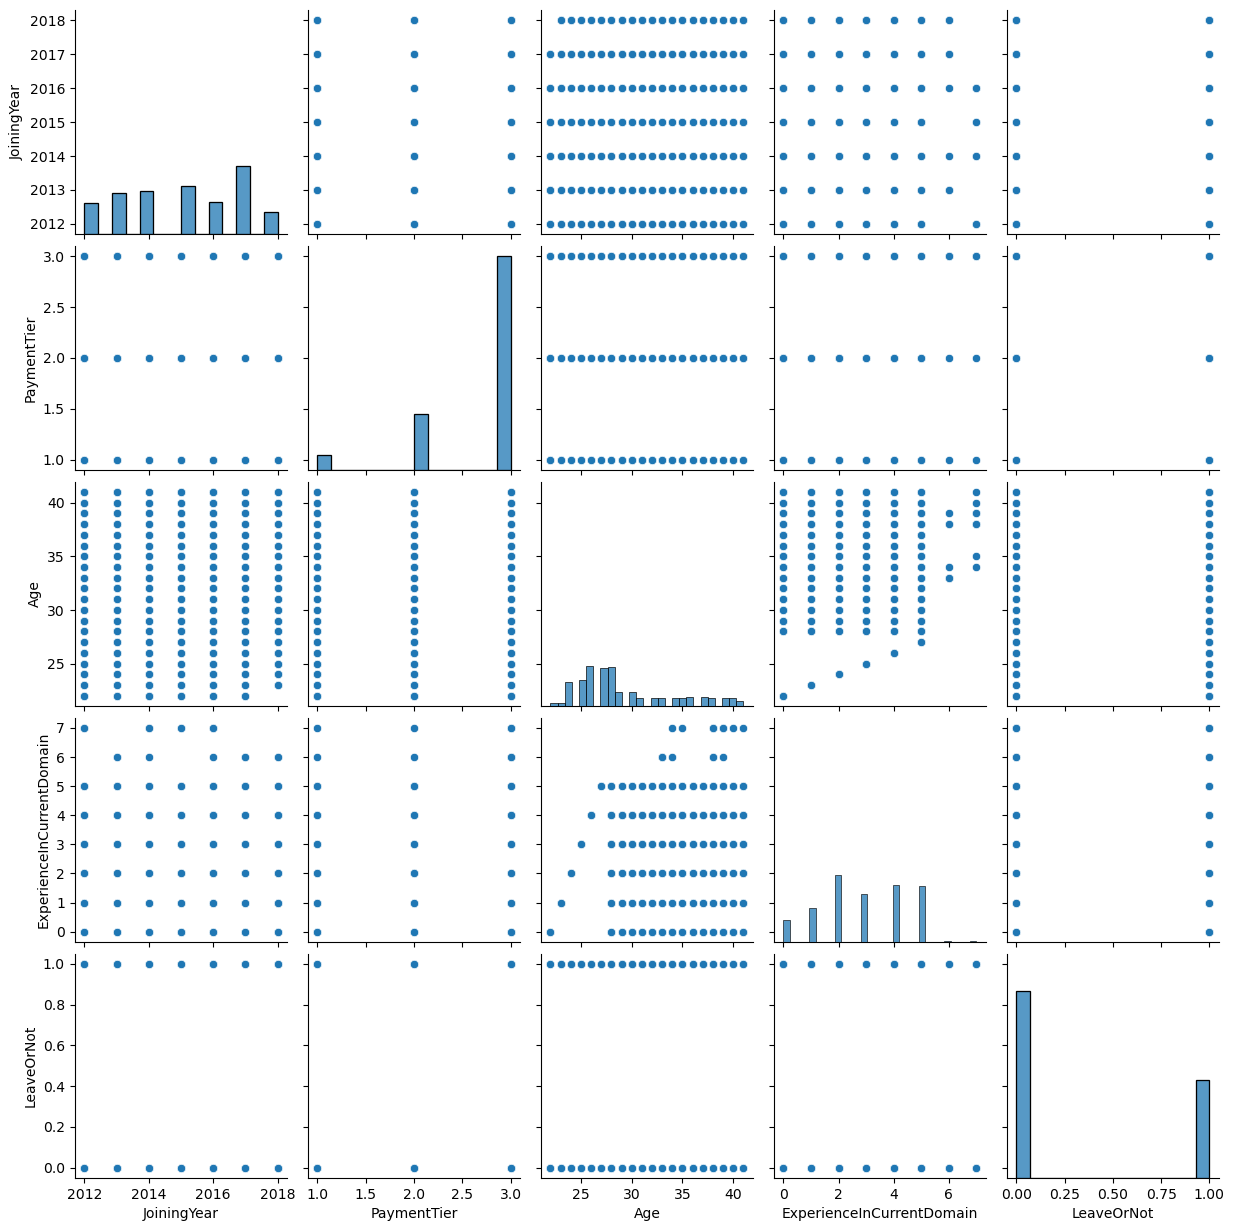

In [21]:
sns.pairplot(df)

<Axes: xlabel='LeaveOrNot', ylabel='count'>

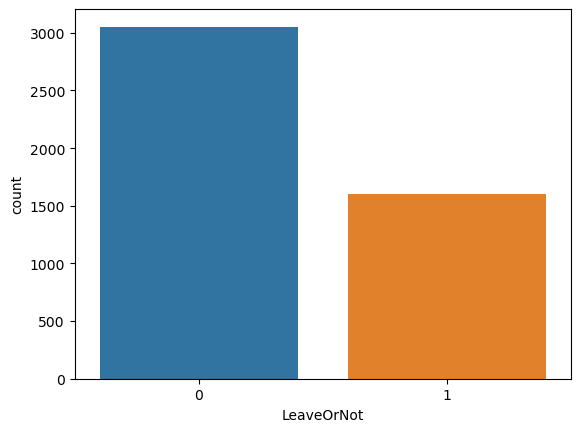

In [24]:
sns.countplot(data = df, x='LeaveOrNot')

<Axes: xlabel='JoiningYear', ylabel='count'>

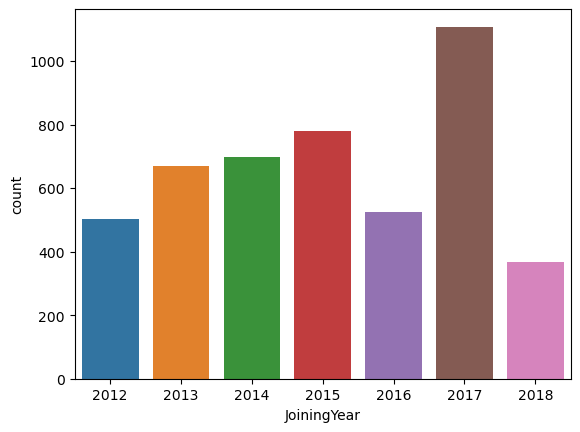

In [31]:
sns.countplot(data = df, x='JoiningYear')

<Axes: xlabel='City', ylabel='count'>

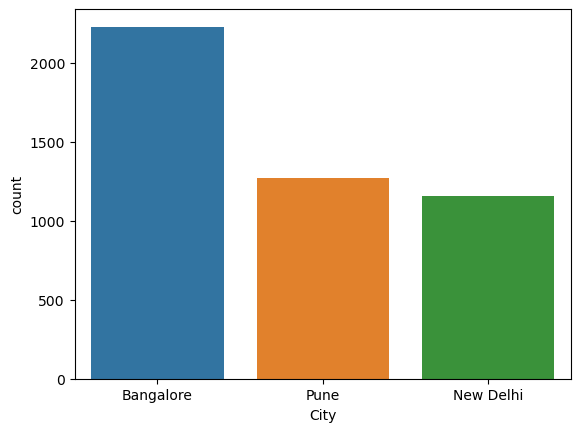

In [32]:
sns.countplot(data = df, x='City')

<Axes: xlabel='PaymentTier', ylabel='count'>

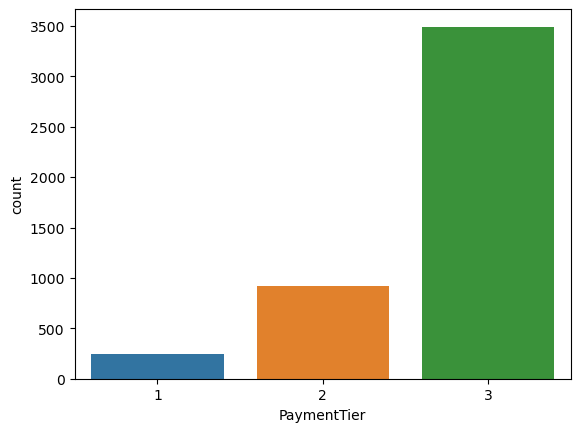

In [33]:
sns.countplot(data = df, x='PaymentTier')

In [43]:
df['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

<Axes: xlabel='Age', ylabel='count'>

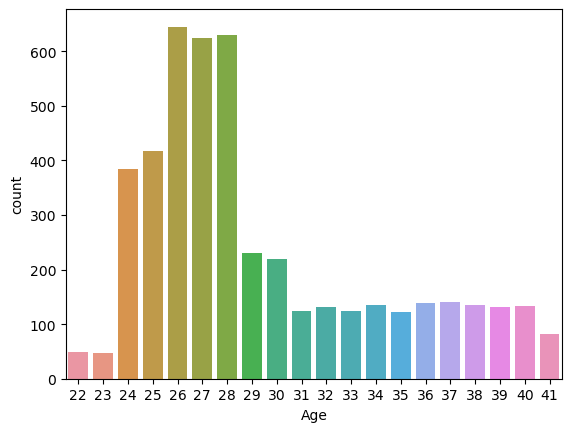

In [35]:
sns.countplot(data = df, x='Age')

<Axes: xlabel='Gender', ylabel='count'>

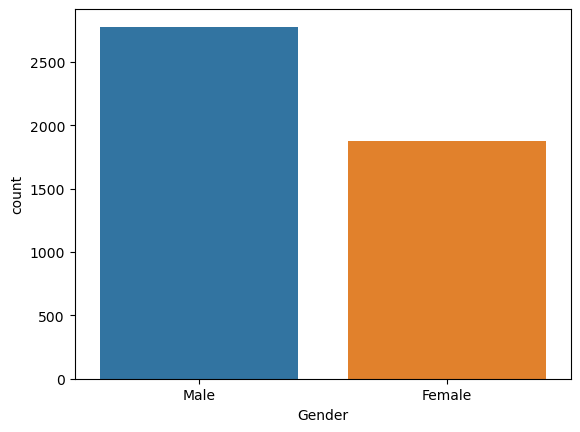

In [36]:
sns.countplot(data = df, x='Gender')

<Axes: xlabel='EverBenched', ylabel='count'>

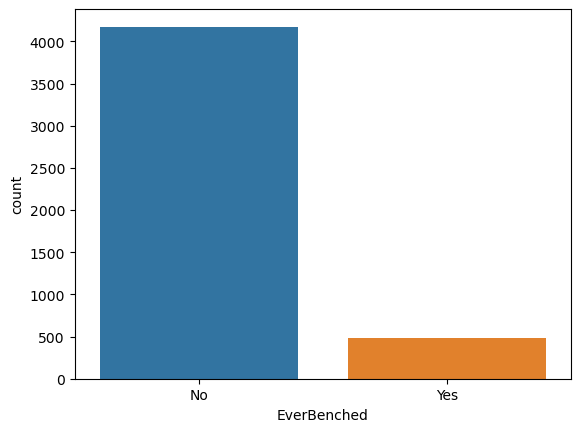

In [37]:
sns.countplot(data = df, x='EverBenched')

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

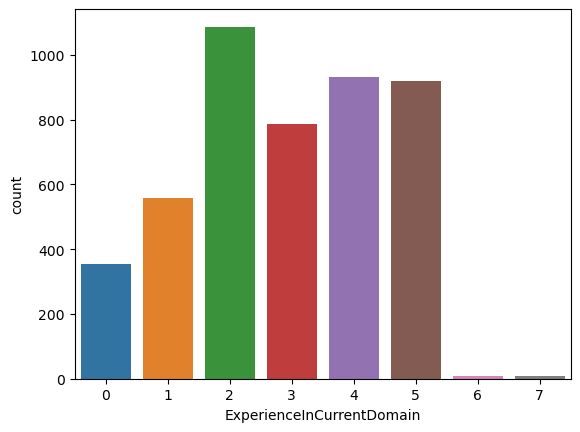

In [38]:
sns.countplot(data = df, x='ExperienceInCurrentDomain')

{'whiskers': [<matplotlib.lines.Line2D at 0x2029ece3210>,
 'caps': [<matplotlib.lines.Line2D at 0x2029ee2c2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2029ee50090>],
 'medians': [<matplotlib.lines.Line2D at 0x2029ee81890>],
 'fliers': [<matplotlib.lines.Line2D at 0x2029ed30f50>],
 'means': []}

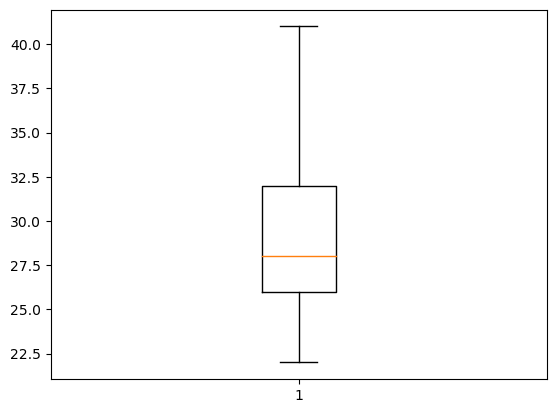

In [40]:
plt.boxplot(df['Age'])

In [45]:
ohe = OneHotEncoder()

In [46]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [52]:
edu_dummies = pd.get_dummies(df['Education'])
edu_dummies

,Bachelors,Masters,PHD
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
4648,1,0,0
4649,0,1,0
4650,0,1,0
4651,1,0,0


In [53]:
city_dummies = pd.get_dummies(df['City'])
city_dummies

,Bangalore,New Delhi,Pune
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
4648,1,0,0
4649,0,0,1
4650,0,1,0
4651,1,0,0


In [58]:
df = pd.concat([df,edu_dummies,city_dummies], axis = 1)

In [59]:
gen_dummies = pd.get_dummies(df['Gender'])
gen_dummies

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
4648,1,0
4649,0,1
4650,0,1
4651,0,1


In [60]:
df['Gender'] =  gen_dummies['Male']

In [61]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,Bachelors,2017,Bangalore,3,34,1,No,0,0,1,0,0,1,0,0
1,Bachelors,2013,Pune,1,28,0,No,3,1,1,0,0,0,0,1
2,Bachelors,2014,New Delhi,3,38,0,No,2,0,1,0,0,0,1,0
3,Masters,2016,Bangalore,3,27,1,No,5,1,0,1,0,1,0,0
4,Masters,2017,Pune,3,24,1,Yes,2,1,0,1,0,0,0,1


In [62]:
ben_dummies = pd.get_dummies(df['EverBenched'])
ben_dummies

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
4648,1,0
4649,1,0
4650,1,0
4651,0,1


In [63]:
df['EverBenched'] = ben_dummies['No']

In [64]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,Bachelors,2017,Bangalore,3,34,1,1,0,0,1,0,0,1,0,0
1,Bachelors,2013,Pune,1,28,0,1,3,1,1,0,0,0,0,1
2,Bachelors,2014,New Delhi,3,38,0,1,2,0,1,0,0,0,1,0
3,Masters,2016,Bangalore,3,27,1,1,5,1,0,1,0,1,0,0
4,Masters,2017,Pune,3,24,1,0,2,1,0,1,0,0,0,1


In [68]:
X = df[['JoiningYear','PaymentTier','Age','Gender','EverBenched','ExperienceInCurrentDomain','LeaveOrNot','Bachelors','Masters','PHD','Bangalore','New Delhi','Pune']]
y = df['LeaveOrNot']

In [77]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
lr = LinearRegression()

In [80]:
model = lr.fit(X_train,y_train)
model

LinearRegression()

In [82]:
model.score(X_train,y_train)

1.0

In [83]:
model.score(X_test, y_test)

1.0

In [85]:
predictions = model.predict(X_test)